### Clustering

When we do clustering, a proximity measure between two points must be defined where proximity is the data similarity or dissimilarity with respect to each other. The similarity measure $S(x_i, x_k)$ is large if the points $x_i, x_k$ are similar while the dissimilarity measure $D(x_i x_k)$ is small if the points $x_i, x_k$ are similar.

Below are the similarity measures that we can use:

1. Vectors: Cosine Distance
$$s(\vec{x}, x') = \frac{x^t x'}{||x||||x'||}$$

2. Sets: Jaccard Distance
$$J(A, B) = \frac{|A\cap B|}{|A\cup B|} = \frac{|A\cap B|}{|A| + |B| - |A\cap B|}$$
If sets $A$ and $B$ are both empty, then we define $J(A, B)=1$ otherwise $0\leq J(A, B) \leq 1$

3. Points: Euclidean Distance
$$d(x, x') = \left(\sum_{k=1}^p \left|x_k - x'_k\right|^q\right)^{1/q}$$

Here is a walkthrough of the k-means algorithm:
1. We start by selecting k centroids where k is the number of clusters.
2. We then place the k centroids in our training data at different random places.
3. We then calculate the distance from each point in the training data to each centroid.
4. The points are then grouped based on the nearest centroid.
5. The grouped points are isolated together with their respective centroid. Find the mean of each group, then move the centroid to the location of the mean we have calculated.
6. We repeat the steps until we reach an optimal number of k groups.



The Silhoutte coefficient is given by
$$S = \frac{b-a}{\max(a,b)}$$

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

We generate a dataset with 4 clusters from the scikit-learn library 'make_blobs' and plot it for visualization.

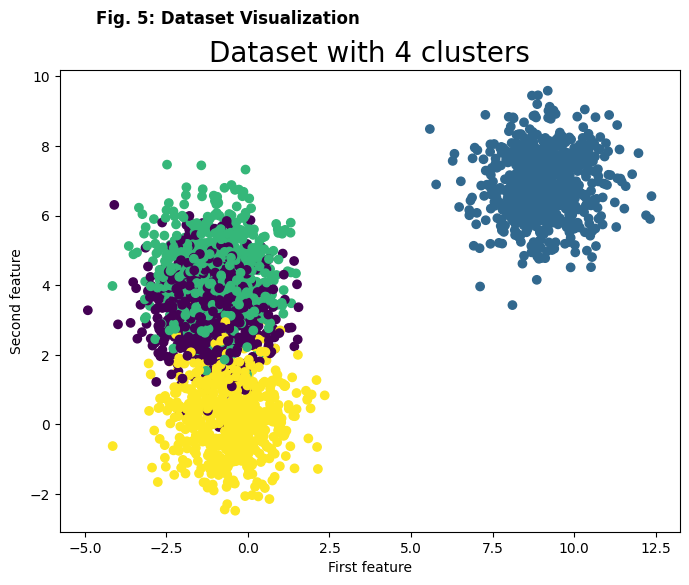

In [12]:
X, y = make_blobs(centers=4, n_samples=2500)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Dataset with 4 clusters", fontsize=20)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.suptitle(
    "Fig. 5: Dataset Visualization", fontweight="bold", horizontalalignment="right"
)
plt.show()

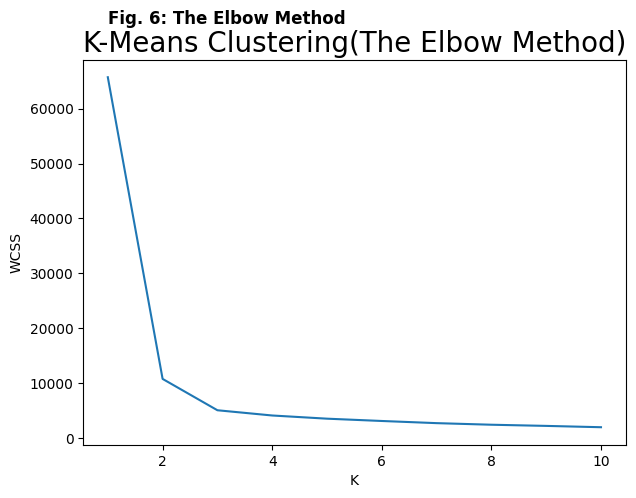

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams["figure.figsize"] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title("K-Means Clustering(The Elbow Method)", fontsize=20)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.suptitle("Fig. 6: The Elbow Method", fontweight="bold", horizontalalignment="right")
plt.show()

Note that after the value of $k = 4$, the WCSS decreases very slowly. Therefore, our value of $k$ is equal to 4.

Mathematically, the objective of the K-means algorithm is to minimize an objective function which in our case is a squared error function given by 
$$J=\sum_{j=1}^k \sum_{i=1}^n ||x_i^{j} - C_j||^2$$

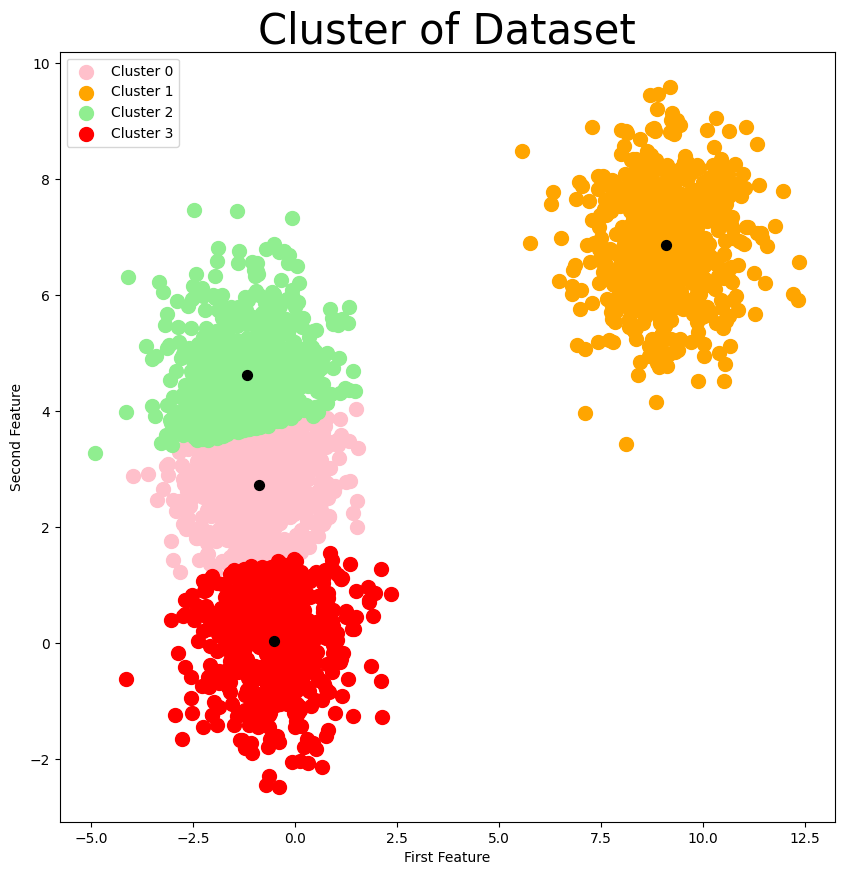

In [14]:
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)
ymeans = kmeans.fit_predict(X)

plt.rcParams["figure.figsize"] = (10, 10)
plt.title("Cluster of Dataset", fontsize=30)

plt.scatter(X[ymeans == 0, 0], X[ymeans == 0, 1], s=100, c="pink", label="Cluster 0")
plt.scatter(X[ymeans == 1, 0], X[ymeans == 1, 1], s=100, c="orange", label="Cluster 1")
plt.scatter(X[ymeans == 2, 0], X[ymeans == 2, 1], s=100, c="lightgreen", label="Cluster 2")
plt.scatter(X[ymeans == 3, 0], X[ymeans == 3, 1], s=100, c="red", label="Cluster 3")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c="black")

plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.legend()
plt.show()

k-Means Algorithm: Expectation–Maximization

1. Randomly select the cluster centers.
2. Repeat the following steps until convergence is reached:
- E-Step: Points are assigned to the nearest cluster center.
- M-Step: Find the mean of each cluster and replace the cluster center with the mean.

In [15]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)


def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap="viridis", s=50 * factor, alpha=0.3)

In [16]:
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(
        centers[:, 0],
        centers[:, 1],
        c=np.arange(4),
        cmap="viridis",
        s=200 * factor,
        alpha=alpha,
    )
    ax.scatter(centers[:, 0], centers[:, 1], c="black", s=50 * factor, alpha=alpha)


def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

C:\Users\HP\AppData\Local\Temp\ipykernel_14564\3401064748.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=c, cmap="viridis", s=50 * factor, alpha=0.3)


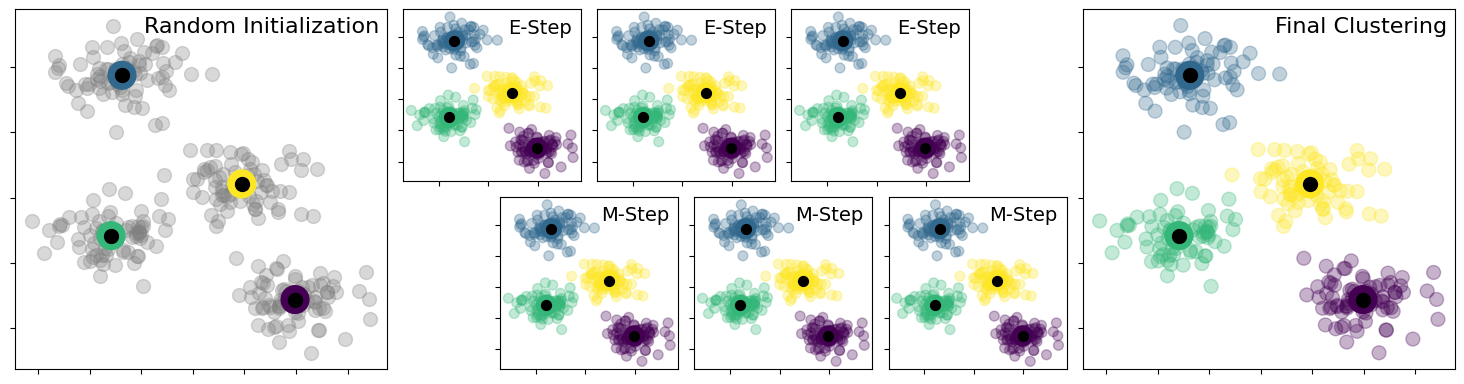

In [20]:
fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(
    0.98,
    0.98,
    "Random Initialization",
    transform=ax0.transAxes,
    ha="right",
    va="top",
    size=16,
)
draw_points(ax0, "gray", factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i : 6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i : 7 + 2 * i])

    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)

    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate(
            "",
            new_centers[i],
            centers[i],
            arrowprops=dict(arrowstyle="->", linewidth=1),
        )

    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha="right", va="top", size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha="right", va="top", size=14)

y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(
    0.98,
    0.98,
    "Final Clustering",
    transform=axf.transAxes,
    ha="right",
    va="top",
    size=16,
)
plt.show()

 Ward Method - Finds distance based on our sum of squares.

In [21]:
X1, y1 = make_blobs(
    n_samples=50, centers=[[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std=0.9
)
df = pd.DataFrame(X1, columns=["X", "y"])
df.head()

,X,y
0,8.818750,3.428478
1,-1.797553,-3.046979
2,4.846599,4.935915
3,9.691461,4.825166
4,-1.543095,0.059304


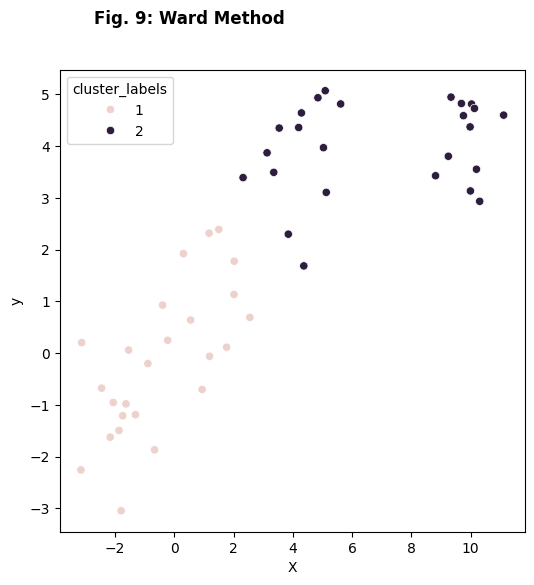

In [25]:
import seaborn as sns
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage()
distance_matrix = linkage(df[["X", "y"]], method="ward", metric="euclidean")

# Assign cluster labels
df["cluster_labels"] = fcluster(distance_matrix, 2, criterion="maxclust")

# Plot clusters
sns.scatterplot(x="X", y="y", hue="cluster_labels", data=df)
plt.rcParams["figure.figsize"] = (6, 6)
plt.suptitle("Fig. 9: Ward Method", fontweight="bold", horizontalalignment="right")
plt.show();

Single: Finds the distance between the closest points in different clusters.

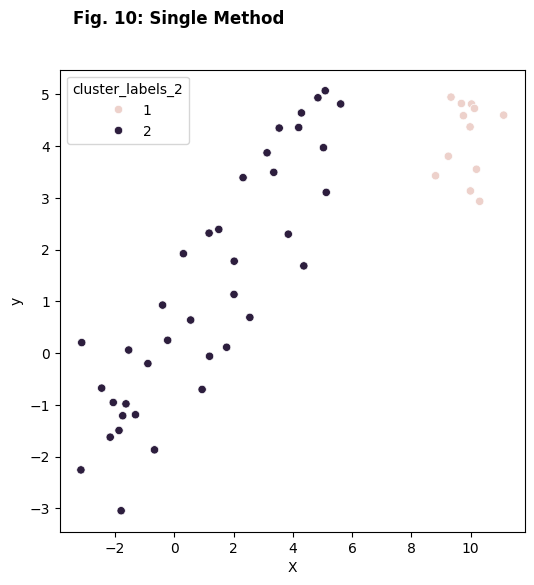

In [24]:
# Use the linkage()
distance_matrix = linkage(df[["X", "y"]], method="single", metric="euclidean")

# Assign cluster labels
df["cluster_labels_2"] = fcluster(distance_matrix, 2, criterion="maxclust")

# Plot clusters
sns.scatterplot(x="X", y="y", hue="cluster_labels_2", data=df)
plt.suptitle("Fig. 10: Single Method", fontweight="bold", horizontalalignment="right")
plt.show();

Complete: Finds the distance between the farthest points in different clusters.

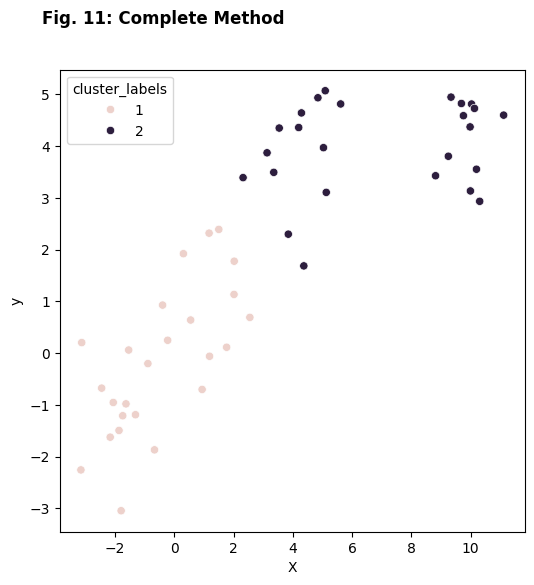

In [26]:
# Use the linkage()
distance_matrix = linkage(df[["X", "y"]], method="complete", metric="euclidean")

# Assign cluster labels
df["cluster_labels_3"] = fcluster(distance_matrix, 2, criterion="maxclust")

# Plot clusters
sns.scatterplot(x="X", y="y", hue="cluster_labels", data=df)
plt.suptitle("Fig. 11: Complete Method", fontweight="bold", horizontalalignment="right")
plt.show();

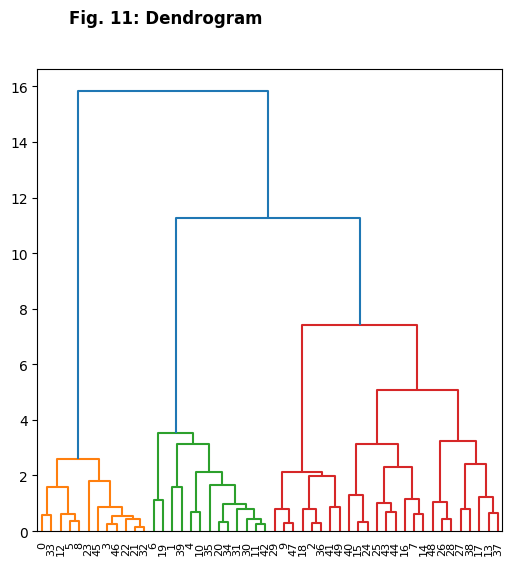

In [27]:
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)
plt.suptitle("Fig. 11: Dendrogram", fontweight="bold", horizontalalignment="right")
plt.show()

Gaussian Mixture Models (GMM)

In [29]:
sns.set()

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]  # flip axes for better plotting

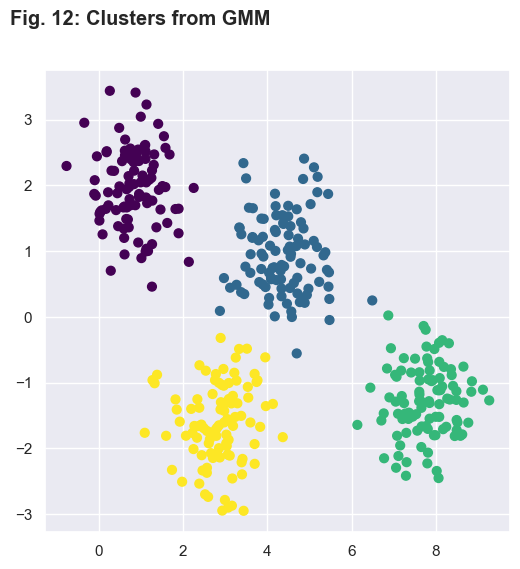

In [30]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="viridis")
plt.suptitle(
    "Fig. 12: Clusters from GMM", fontweight="bold", horizontalalignment="right"
)
plt.show();

In [31]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.537 0.463 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]]


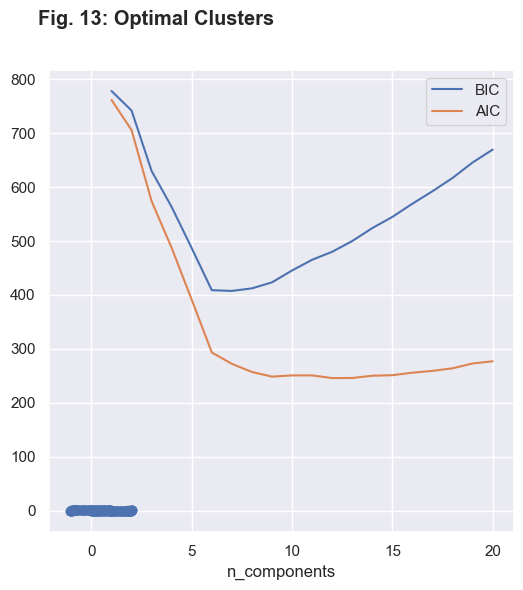

In [32]:
from sklearn.datasets import make_moons

Xmoon, ymoon = make_moons(200, noise=0.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

n_components = np.arange(1, 21)
models = [
    mixture.GaussianMixture(n, covariance_type="full", random_state=0).fit(Xmoon)
    for n in n_components
]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label="BIC")
plt.plot(n_components, [m.aic(Xmoon) for m in models], label="AIC")
plt.legend(loc="best")
plt.xlabel("n_components")
plt.suptitle(
    "Fig. 13: Optimal Clusters", fontweight="bold", horizontalalignment="right"
);

DBSCAN

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, cluster_std=clusterDeviation)
    X = StandardScaler().fit_transform(X)
    return X, y

X, y = createDataPoints([[4, 3], [2, -1], [-1, 4]], 1500, 0.5)



In [34]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 0, ..., 1, 2, 0], dtype=int64)

In [35]:
# First, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [36]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [37]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [38]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

C:\Users\HP\AppData\Local\Temp\ipykernel_14564\3657666704.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1], s=50, c=col, marker="o", alpha=0.5)
C:\Users\HP\AppData\Local\Temp\ipykernel_14564\3657666704.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1], s=50, c=col, marker="o", alpha=0.5)


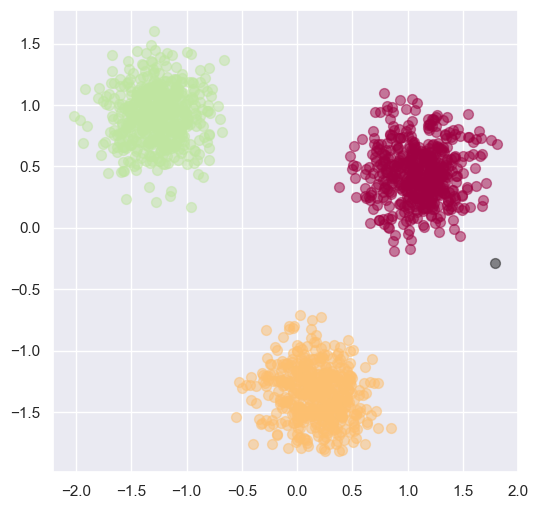

In [39]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = "k"

    class_member_mask = labels == k

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=col, marker="o", alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=col, marker="o", alpha=0.5)
plt.show()